# 考研复试通过率



## 概率


比如20人过线，招12人，那么每个人的几率

In [200]:
11/20

0.55

# 复试


## 复试占比


一个人初试成绩350，复试占比50%，比如复试成绩是75，那么——

In [2]:
50 * (350/500) + 50 * (75/100)

72.5

## 复试分时

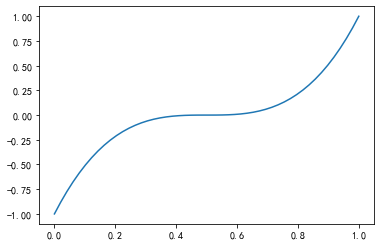

In [146]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['font.family'] = ['SimHei'] # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(6, 4))
# ax.set_xlim(-1, 1)
# ax.set_ylim(-1, 1)
x = np.linspace(0, 1)
y = (((x*2 - 1)) ** (3))
# y = 2 * x
ax.plot(x, y)

原始

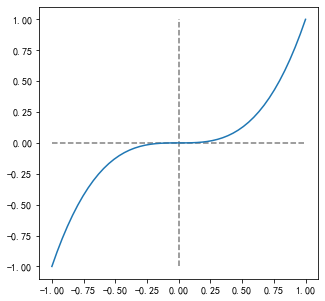

In [151]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.hlines(0, -1, 1, 'grey', '--')
ax.vlines(0, -1, 1, 'grey', '--')
x = np.linspace(-1, 1)
y = x ** 3
ax.plot(x, y)

调整

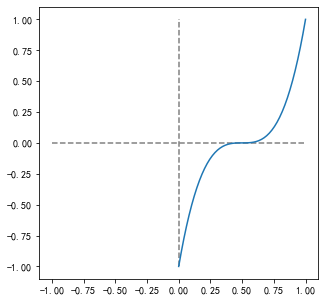

In [153]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.hlines(0, -1, 1, 'grey', '--')
ax.vlines(0, -1, 1, 'grey', '--')
x = np.linspace(0, 1)
y = (x*2 - 1) ** 3
ax.plot(x, y)

分数匹配

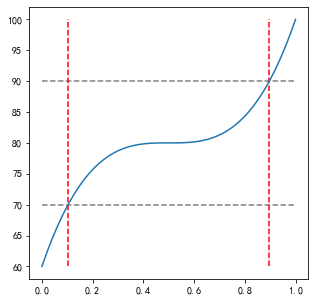

In [170]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.hlines(70, 0, 1, 'grey', '--')
ax.hlines(90, 0, 1, 'grey', '--')
ax.vlines(0.1031497370079501, 60, 100, 'red', '--')
ax.vlines(0.8968502629920498, 60, 100, 'red', '--')
x = np.linspace(0, 1)
y = ((x*2 - 1) ** 3)*20 + 80
ax.plot(x, y)

尝试更大幂

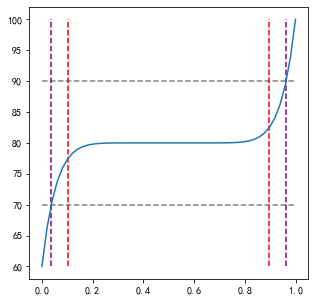

In [179]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.hlines(70, 0, 1, 'grey', '--')
ax.hlines(90, 0, 1, 'grey', '--')
ax.vlines(0.1031497370079501, 60, 100, 'red', '--')
ax.vlines(0.8968502629920498, 60, 100, 'red', '--')
ax.vlines(0.0370626438563548, 60, 100, 'purple', '--')
ax.vlines(0.9629373561436452, 60, 100, 'purple', '--')
x = np.linspace(0, 1)
y = ((x*2 - 1) ** 9)*20 + 80
ax.plot(x, y)

随机分数

In [199]:
import random
def aggregate(score):
    x = random.random()
    y = ((x*2 - 1) ** 3)*20 + 80
    return 50 * (score/500) + 50 * (y/100)
aggregate(350)

74.4028400901793

In [289]:
import pandas as pd
class Aggregate:
    def __init__(self):
        pass
    def preliminary(self, xls, id, rank):
        """
        初试成绩
        xls 成绩表
        id  参考人id
        rank    录取名次
        """
        self.df = pd.read_excel(xls)
        self.id = id
        self.rank = rank
    def reexam(self, seed=1):
        """
        模拟复试分数
        """
        random.seed(seed)
        self.df['复试'] = self.df['分数'].map(lambda x:((random.random()*2 - 1) ** 3)*20 + 80)
        self.df['总分'] = 50 * (self.df['分数']/500) + 50 * (self.df['复试']/100)
        self.df = self.df.sort_values(by="总分", ascending=False)
        return self.df
    def sim(self):
        """
        模拟
        """
        enroll = 0
        times = 500
        for n in range(1, times):
            df = self.reexam(n)
            target = df[df['编号'] == self.id]
            rank = df[df['总分'] > target['总分'].values[0]]
            if rank.count()[0] <= 12:
                enroll += 1
        return enroll / times
agg = Aggregate()
agg.preliminary('./preliminary.xlsx', 10014, 12)
agg.sim()

0.524

In [212]:
random.seed(1)
print(random.random(), random.random())

0.13436424411240122 0.8474337369372327
